# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

<h1>План урока<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#mini-batch-сильно-занижает-ошибку.-проверить-код!" data-toc-modified-id="mini-batch-сильно-занижает-ошибку.-проверить-код!-1">mini-batch сильно занижает ошибку. проверить код!</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-2">Масштабирование признаков</a></span><ul class="toc-item"><li><span><a href="#Нормализация-[0,-1]" data-toc-modified-id="Нормализация-[0,-1]-2.1">Нормализация [0, 1]</a></span></li><li><span><a href="#Стандартизация" data-toc-modified-id="Стандартизация-2.2">Стандартизация</a></span></li></ul></li><li><span><a href="#Стохастический-градиентный-спуск-и-mini-batch-градиентный-спуск" data-toc-modified-id="Стохастический-градиентный-спуск-и-mini-batch-градиентный-спуск-3">Стохастический градиентный спуск и mini-batch градиентный спуск</a></span></li><li><span><a href="#Регуляризация" data-toc-modified-id="Регуляризация-4">Регуляризация</a></span><ul class="toc-item"><li><span><a href="#L1-регуляризация---Lasso" data-toc-modified-id="L1-регуляризация---Lasso-4.1">L1 регуляризация - Lasso</a></span></li><li><span><a href="#L2-регуляризация---Ridge" data-toc-modified-id="L2-регуляризация---Ridge-4.2">L2 регуляризация - Ridge</a></span></li></ul></li><li><span><a href="#Домашние-задания" data-toc-modified-id="Домашние-задания-5">Домашние задания</a></span></li></ul></div>

## mini-batch сильно занижает ошибку. проверить код!

In [101]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

## Масштабирование признаков

In [102]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]]).T  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [103]:
# веса по МНК
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([3.98828270e+01, 2.18657683e+00, 2.94591674e-03, 5.27047320e+00])

In [104]:
X_1 = [1, 1, 1000, 1]
X_2 = [1, 1, 1000, 2]
X_1 @ w, X_2 @ w

(50.285793741586204, 55.55626694644788)

### Нормализация [0, 1]

In [105]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [106]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [107]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

$$x_{ij} = \frac{x_{ij} - min_{j} (x_{ij})}{max_{j} (x_{ij})-min_{j} (x_{ij})}$$

In [108]:
X_norm[:, 1] = (X[:, 1] - X[:, 1].min()) / (X[:, 1].max() - X[:, 1].min())
X_norm[:, 1]

array([0.1, 0.1, 0.2, 0.1, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

In [109]:
X_norm[:, 2] = (X[:, 2] - X[:, 2].min()) / (X[:, 2].max() - X[:, 2].min())
X_norm[:, 2]

array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
       0.22580645, 0.67741935, 1.        , 0.        , 0.35483871])

### Стандартизация

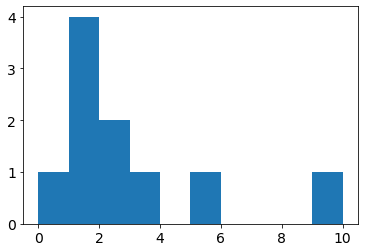

In [110]:
plt.hist(X[:, 1]);

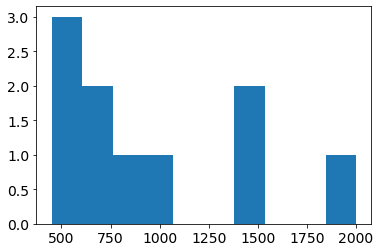

In [111]:
plt.hist(X[:, 2]);

$$s_{ij}=\frac{x_{ij} - \mu_{j}}{\sigma_{j}}$$

In [112]:
X_st = X.copy().astype(np.float64)

X_st[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_st[:, 1]

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [113]:
X_st[:, 1].mean(), X_st[:, 1].std()

(3.3306690738754695e-17, 1.0)

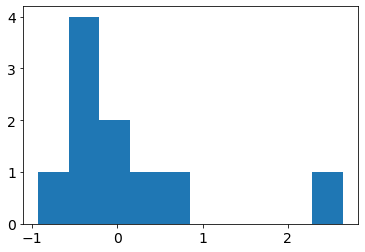

In [114]:
plt.hist(X_st[:, 1]);

In [115]:
def calc_std_feat(x):
    s = (x - x.mean()) / x.std()
    return s

In [116]:
X_st[:, 2] = calc_std_feat(X[:, 2])
X_st[:, 3] = calc_std_feat(X[:, 3])
print(X_st[:, 2])
print(X_st[:, 3])

[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]
[-0.89625816 -0.89625816  0.38411064 -0.89625816  0.38411064 -0.89625816
  1.66447944  1.66447944 -0.89625816  0.38411064]


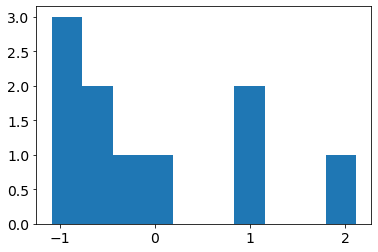

In [117]:
plt.hist(X_st[:, 2]);

In [118]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

# Метод градиентного спуска
def eval_GD(X, y, iterations, alpha=1e-4, show=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    err_list = []
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        err_list.append(err)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    if show == True:
        return err_list
    else:
        return w

In [119]:
np.linalg.inv(X_st.T @ X_st) @ X_st.T @ y

array([57.4       ,  6.12241513,  1.42846588,  4.11637116])

In [120]:
w_sq_st = np.linalg.inv(X_st.T @ X_st) @ X_st.T @ y
y_pred = np.dot(X_st, w_sq_st)
err_sq = calc_mse(y, y_pred)
print(f'MSE для МНК для данных после стандартизации \t- {err_sq}\n')

w_sq = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = np.dot(X, w_sq)
err = calc_mse(y, y_pred)
print(f'MSE для МНК для данных БЕЗ стандартизации \t- {err}\n')

w_gd_st = eval_GD(X_st, y, iterations=1500, alpha=1e-2)
y_pred = np.dot(X_st, w_gd_st)
err_st = calc_mse(y, y_pred)
print(f'MSE для метода градиентного спуска для данных после стандартизации - {err_st}\n')

# Градиентный спуск на данных без стандартизации не сходится! 
w_gd = eval_GD(X, y, iterations=1500, alpha=1e-2)
y_pred = np.dot(X, w_gd)
err_gd = calc_mse(y, y_pred)
print(f'MSE для метода градиентного спуска для данных БЕЗ стандартизации - {err_gd}\n')

MSE для МНК для данных после стандартизации 	- 39.777746035558316

MSE для МНК для данных БЕЗ стандартизации 	- 39.77774603555831

150 [54.6517977   3.93619295  3.32277184  4.38532407] 48.50975036735786
300 [57.26727276  4.55529967  2.89027948  4.20488959] 40.2568881963691
450 [57.3935898   4.99245761  2.55431791  4.1072208 ] 40.02700920102978
600 [57.39969041  5.30327372  2.29437853  4.05919065] 39.91468961744933
750 [57.39998505  5.52555085  2.09368278  4.03988293] 39.85398827258408
900 [57.39999928  5.6854157   1.93900185  4.03650044] 39.820644308603235
1050 [57.39999997  5.80102512  1.81996261  4.04134839] 39.80208512858156
1200 [57.4         5.8850695   1.72846716  4.0499101 ] 39.79164482320059
1350 [57.4         5.94647036  1.65821673  4.05962582] 39.78572228821726
1500 [57.4         5.99153676  1.60432664  4.06912267] 39.78234065772863
MSE для метода градиентного спуска для данных после стандартизации - 39.78232384079615

150 [nan nan nan nan] nan
300 [nan nan nan nan] nan
450 [

/var/folders/lw/sfx9kxt17jj8cb5s59ll44q80000gp/T/ipykernel_15750/1461585088.py:2: RuntimeWarning: overflow encountered in square
  err = np.mean((y - y_pred)**2)
/var/folders/lw/sfx9kxt17jj8cb5s59ll44q80000gp/T/ipykernel_15750/1461585088.py:15: RuntimeWarning: invalid value encountered in subtract
  w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))


## Стохастический градиентный спуск и mini-batch градиентный спуск

На каждом шаге итерации градиентный спуск вычисляет градиенты для всего обучающего набора, стохастический градиентный спуск вычисляет градиент для одного объекта, а mini-batch градиентный спуск будет случайно отбирать небольшой набор данных (batch) и по ним вычислять градиент.

In [121]:
# SGD - стохастический градиентный спуск
def eval_SGD(X, y, iterations, alpha=1e-4, show=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    err_list = []
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        err_list.append(err)
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= alpha * (2 * np.dot((y_pred - y[ind]), X[ind]))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    if show == True:
        return err_list
    else:
        return w, err

In [122]:
# 26.995611345195748
def eval_mbGD(X, y, iterations, batch=1, alpha=1e-4, show=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // batch
    print('Количество батчей - ', n_batch)
    if n % batch != 0:
        n_batch += 1
    err_list = []    
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        err_list.append(err)
        for b in range(n_batch):
            start_ = batch * b
            end_ = batch * (b + 1)
            X_b = X[start_ : end_, :]
            y_b = y[start_ : end_]
            y_pred = np.dot(X_b, w)
            w -= alpha * (2/len(y_b) * np.dot((y_pred - y_b), X_b))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    if show == True:
        return err_list
    else:
        return w, err

In [123]:
%%time

eval_GD(X_st, y, iterations=1000, alpha=1e-3)

100 [10.82085913  1.29195795  1.98348488  2.85162983] 2248.0687649833903
200 [19.27186149  2.14047528  2.7330693   3.60356199] 1510.2342373891095
300 [26.18957149  2.65450377  3.14650922  4.02491826] 1022.3117228222378
400 [31.85217926  2.97593535  3.36731266  4.25691776] 697.4953996732185
500 [36.48740201  3.18621662  3.47783381  4.380594  ] 480.53723685247013
600 [40.28164149  3.33210452  3.52533114  4.4424407 ] 335.3786903208636
700 [43.38747997  3.44044741  3.53692186  4.46912965] 238.17499151935831
800 [45.92981625  3.52666784  3.52816434  4.4759573 ] 173.05307208407038
900 [48.01088834  3.59963079  3.50798339  4.47169216] 129.4114395039912
1000 [49.71438487  3.66443755  3.48149699  4.4613567 ] 100.15781666892352
CPU times: user 77.8 ms, sys: 18.6 ms, total: 96.4 ms
Wall time: 110 ms


array([49.71438487,  3.66443755,  3.48149699,  4.4613567 ])

In [124]:
%%time

eval_SGD(X_st, y, iterations=1000, alpha=1e-3) 

100 [11.09673045  2.76640986  3.09785138  4.05453675] 2198.8260418322543
200 [19.40970234  2.86400447  3.09542826  4.41261566] 1489.2685911460044
300 [26.17509739  3.11438104  2.58040039  4.09774734] 1023.6032132506491
400 [31.81702081  3.52542922  3.12340955  4.91301949] 698.280881085139
500 [36.60993144  3.44836722  3.08448844  5.056057  ] 475.87491472215333
600 [40.30217517  3.07591389  2.79879237  4.97630842] 334.73121001431434
700 [43.25459714  3.16236038  3.0582185   5.02397079] 241.43930064205966
800 [45.76168692  3.39544823  3.18838517  5.19073598] 177.1779186488138
900 [47.76897074  3.42737814  3.03692328  4.92938277] 134.3585635124187
1000 [49.48646635  3.6879653   3.15768445  4.99102713] 104.15396824710633
CPU times: user 94.1 ms, sys: 21.9 ms, total: 116 ms
Wall time: 113 ms


(array([49.48646635,  3.6879653 ,  3.15768445,  4.99102713]),
 104.15396824710633)

In [125]:
%%time

eval_mbGD(X_st, y, iterations=1000, batch=10, alpha=1e-3) 

Количество батчей -  1
100 [10.82085913  1.29195795  1.98348488  2.85162983] 2248.0687649833903
200 [19.27186149  2.14047528  2.7330693   3.60356199] 1510.2342373891095
300 [26.18957149  2.65450377  3.14650922  4.02491826] 1022.3117228222378
400 [31.85217926  2.97593535  3.36731266  4.25691776] 697.4953996732185
500 [36.48740201  3.18621662  3.47783381  4.380594  ] 480.53723685247013
600 [40.28164149  3.33210452  3.52533114  4.4424407 ] 335.3786903208636
700 [43.38747997  3.44044741  3.53692186  4.46912965] 238.17499151935831
800 [45.92981625  3.52666784  3.52816434  4.4759573 ] 173.05307208407038
900 [48.01088834  3.59963079  3.50798339  4.47169216] 129.4114395039912
1000 [49.71438487  3.66443755  3.48149699  4.4613567 ] 100.15781666892352
CPU times: user 94 ms, sys: 29.4 ms, total: 123 ms
Wall time: 122 ms


(array([49.71438487,  3.66443755,  3.48149699,  4.4613567 ]),
 100.15781666892352)

## Регуляризация

### L1 регуляризация - Lasso

$$\sum^{n}_{i=1}L_i(\vec{x}_i,{y_i},\vec{w}) + \lambda \sum^{m}_{j=1}|w_{j}| \rightarrow \underset{w}{\text{min}}$$

### L2 регуляризация - Ridge

$$\sum^{n}_{i=1}L_i(\vec{x}_i,y_i,\vec{w}) + \lambda \sum^{m}_{j=1}w_{j}^{2} \rightarrow \underset{w}{\text{min}}$$

In [126]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + 2 * lambda_ * w)
        if verbose and i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [127]:
eval_model_reg2(X_st, y, iterations=1000, alpha=1e-3, lambda_=0, verbose=True)

100 [10.82085913  1.29195795  1.98348488  2.85162983] 2248.0687649833903
200 [19.27186149  2.14047528  2.7330693   3.60356199] 1510.2342373891095
300 [26.18957149  2.65450377  3.14650922  4.02491826] 1022.3117228222378
400 [31.85217926  2.97593535  3.36731266  4.25691776] 697.4953996732185
500 [36.48740201  3.18621662  3.47783381  4.380594  ] 480.53723685247013
600 [40.28164149  3.33210452  3.52533114  4.4424407 ] 335.3786903208636
700 [43.38747997  3.44044741  3.53692186  4.46912965] 238.17499151935831
800 [45.92981625  3.52666784  3.52816434  4.4759573 ] 173.05307208407038
900 [48.01088834  3.59963079  3.50798339  4.47169216] 129.4114395039912
1000 [49.71438487  3.66443755  3.48149699  4.4613567 ] 100.15781666892352


array([49.71438487,  3.66443755,  3.48149699,  4.4613567 ])

Веса без регуляризации: [49.71438487,  3.66443755,  3.48149699,  4.4613567 ]

Визуализируем изменение весов при изменении коэффициента регуляризации.

In [128]:
w_list = []
l_list = []
error_list = []

for l in np.logspace(start=-4, stop=1, num=20):
    l_list.append(l)
    w_new = eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=l)
    w_list.append(w_new)
    error_list.append(calc_mse(y, np.dot(X_st, w_new)))
weights = np.array(w_list)
errors = np.array(error_list)

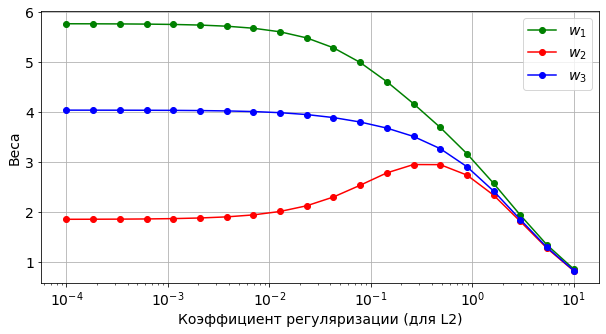

In [129]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
#plt.plot(l_list, weights[:, 0], 'mo-', label=r'$w_0$')
plt.plot(l_list, weights[:, 1], 'go-', label=r'$w_1$')
plt.plot(l_list, weights[:, 2], 'ro-', label=r'$w_2$')
plt.plot(l_list, weights[:, 3], 'bo-', label=r'$w_3$')
plt.xlabel('Коэффициент регуляризации (для L2)')
plt.ylabel('Веса')
plt.grid()
plt.legend();

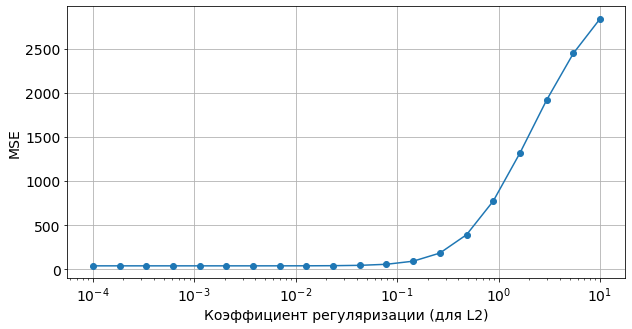

In [130]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(l_list, errors, 'o-')
plt.xlabel('Коэффициент регуляризации (для L2)')
plt.ylabel('MSE')
plt.grid();

## Домашние задания

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и  стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.
2. [\*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов (лучше графически).  


In [131]:
from sklearn import datasets

X_, y_, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=10, 
                                      n_informative=3, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

Методичка https://colab.research.google.com/drive/1nEC_D2y-maMuvbN-5iYFAjzLUw0eGOir

In [132]:
coef

array([ 0.        ,  7.18075454, 10.30191944, 32.12551734,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [133]:
def show_coef(coef):
    round_coef = []
    for i in coef:
        i = round(i, 4)
        round_coef.append(i)
    return  round_coef  

In [134]:
gd = eval_GD(X_, y_, iterations=1000, alpha=1e-3)

100 [ 0.30596255  1.30048733  2.51171041  7.22090886 -0.34546743 -0.06808626
  1.2163988   0.48110829 -0.49877396  0.42027249] 774.3006371432413
200 [ 0.17006585  2.45937157  4.01314555 11.85936208 -0.4149335   0.05235126
  0.93049658  0.28092283 -0.50890083  0.33183591] 519.7958758428306
300 [ 0.07521932  3.39251836  5.22229841 15.6360201  -0.45359842  0.13797097
  0.70606975  0.14451733 -0.5056356   0.26877786] 351.8057313308904
400 [ 1.08650201e-02  4.14363341e+00  6.19587421e+00  1.87115372e+01
 -4.69947652e-01  1.97197452e-01  5.30647241e-01  5.49219554e-02
 -4.93320598e-01  2.24626473e-01] 240.86910075095778
500 [-3.10418453e-02  4.74799910e+00  6.97960481e+00  2.12165279e+01
 -4.70461116e-01  2.36582319e-01  3.94176323e-01 -6.85988964e-04
 -4.75188161e-01  1.94455688e-01] 167.57360596980715
600 [-0.05660506  5.23409236  7.61036828 23.25719964 -0.46005302  0.26120058
  0.28857222 -0.03194709 -0.45361738  0.17453111] 119.12300714609275
700 [-0.07043291  5.62489246  8.11789956 24.9

In [135]:
gd

array([-0.07190288,  6.39368384,  9.11848247, 28.27991751, -0.37020575,
        0.27775804,  0.063071  , -0.03236137, -0.3607268 ,  0.15051902])

In [136]:
print(show_coef(gd))

[-0.0719, 6.3937, 9.1185, 28.2799, -0.3702, 0.2778, 0.0631, -0.0324, -0.3607, 0.1505]


In [137]:
sgd = eval_SGD(X_, y_, iterations=1000, alpha=1e-3)

100 [ 0.21746844  1.7602708   1.47421753  8.62217799 -0.70957422  0.02571641
  1.37986931  1.42903813  0.13179399  1.0708656 ] 719.8285663995921
200 [ 0.39095596  3.44998926  3.74849537 12.30621291 -0.59261113  0.59281473
  0.47840248 -0.23325422 -0.63721955  0.62370032] 493.03549734910297
300 [ 0.24424148  3.44426762  4.88632703 16.47730737 -1.22199323  0.30371651
 -0.09259301 -0.17566727 -0.16956273  0.90524162] 326.2266006462754
400 [ 0.74875426  4.66359959  5.95161023 19.88620252 -1.08642687  0.60237048
 -0.5320573  -0.50482426 -0.19680148  0.65511095] 208.93744115432162
500 [ 0.51015414  5.32022456  6.59074545 22.50490526 -0.82971066  0.57994449
 -0.39254209 -0.50924689 -0.21433616  0.32136827] 140.2153101605467
600 [ 0.17164879  6.06522567  7.01661371 24.06281816 -0.82203445  0.61950927
 -0.34990735 -0.3896893  -0.11723485  0.14825909] 105.73876567080399
700 [ 0.28915604  6.17965864  7.3613397  25.59596361 -0.66403196  0.70690158
  0.18132188 -0.52229348  0.1820962   0.18831877] 

In [138]:
gd_err = gd = eval_GD(X_, y_, iterations=1500, alpha=1e-3, show=True)

150 [ 2.32106113e-01  1.91125899e+00  3.30300383e+00  9.65925370e+00
 -3.84673580e-01 -2.90275980e-03  1.06487514e+00  3.71788658e-01
 -5.05834575e-01  3.72405376e-01] 633.873124500776
300 [ 0.07521932  3.39251836  5.22229841 15.6360201  -0.45359842  0.13797097
  0.70606975  0.14451733 -0.5056356   0.26877786] 351.8057313308904
450 [-1.24731275e-02  4.46223730e+00  6.60897960e+00  2.00281965e+01
 -4.71844493e-01  2.19022337e-01  4.58089565e-01  2.35369798e-02
 -4.84815461e-01  2.08051269e-01] 200.44000363248395
600 [-0.05660506  5.23409236  7.61036828 23.25719964 -0.46005302  0.26120058
  0.28857222 -0.03194709 -0.45361738  0.17453111] 119.12300714609275
750 [-0.07406415  5.79049986  8.33313756 25.63205741 -0.43178336  0.27874657
  0.17421279 -0.04843067 -0.41845129  0.15788839] 75.38656089424607
900 [-0.0758389   6.19118286  8.85450706 27.37945868 -0.39575264  0.28123321
  0.09832003 -0.0428702  -0.38317592  0.15140222] 51.833562589867014
1050 [-6.89661169e-02  6.47939644e+00  9.23035

In [139]:
sgd_err = eval_SGD(X_, y_, iterations=1500, alpha=1e-3, show=True)

150 [ 0.87666807  2.92988093  2.64461753 10.33052975 -0.44277131  0.43634816
  0.51313568  0.74852027 -0.29778708  0.87374565] 603.0312578529152
300 [ 0.24424148  3.44426762  4.88632703 16.47730737 -1.22199323  0.30371651
 -0.09259301 -0.17566727 -0.16956273  0.90524162] 326.2266006462754
450 [ 0.68576074  4.946634    6.41097806 21.18380482 -0.79373403  0.4300289
 -0.67314578 -0.33984662 -0.02201347  0.6100648 ] 172.25408953169605
600 [ 0.17164879  6.06522567  7.01661371 24.06281816 -0.82203445  0.61950927
 -0.34990735 -0.3896893  -0.11723485  0.14825909] 105.73876567080399
750 [ 0.15970411  6.32821693  7.65446448 26.30305317 -0.74956522  0.79301571
  0.11035211 -0.25632793  0.29995587  0.1126574 ] 69.18689049534774
900 [-2.26975520e-03  6.77973621e+00  8.65566653e+00  2.79511637e+01
 -8.85437227e-01  5.54690609e-01  1.30586680e-01 -4.63703324e-01
  2.73907296e-01  7.67192248e-02] 47.015255024999284
1050 [ 1.74838545e-02  6.82193434e+00  9.23425168e+00  2.90877520e+01
 -8.40955684e-01 

In [153]:
mb_err = eval_mbGD(X_, y_, iterations=1500, alpha=1e-3,batch=5, show=True)

Количество батчей -  200
150 [ 2.64159951e-02  7.17680475e+00  1.01666433e+01  3.22921763e+01
 -1.03081971e-01  1.55798117e-01 -6.95026537e-03  1.86856474e-01
 -1.57766450e-01  2.05017927e-01] 24.163702486679835
300 [ 2.64159951e-02  7.17680475e+00  1.01666433e+01  3.22921763e+01
 -1.03081971e-01  1.55798117e-01 -6.95026537e-03  1.86856474e-01
 -1.57766450e-01  2.05017927e-01] 24.163702486679835
450 [ 2.64159951e-02  7.17680475e+00  1.01666433e+01  3.22921763e+01
 -1.03081971e-01  1.55798117e-01 -6.95026537e-03  1.86856474e-01
 -1.57766450e-01  2.05017927e-01] 24.163702486679835
600 [ 2.64159951e-02  7.17680475e+00  1.01666433e+01  3.22921763e+01
 -1.03081971e-01  1.55798117e-01 -6.95026537e-03  1.86856474e-01
 -1.57766450e-01  2.05017927e-01] 24.163702486679835
750 [ 2.64159951e-02  7.17680475e+00  1.01666433e+01  3.22921763e+01
 -1.03081971e-01  1.55798117e-01 -6.95026537e-03  1.86856474e-01
 -1.57766450e-01  2.05017927e-01] 24.163702486679835
900 [ 2.64159951e-02  7.17680475e+00  1.

In [154]:
iterations = np.array([i for i in range(1500)])

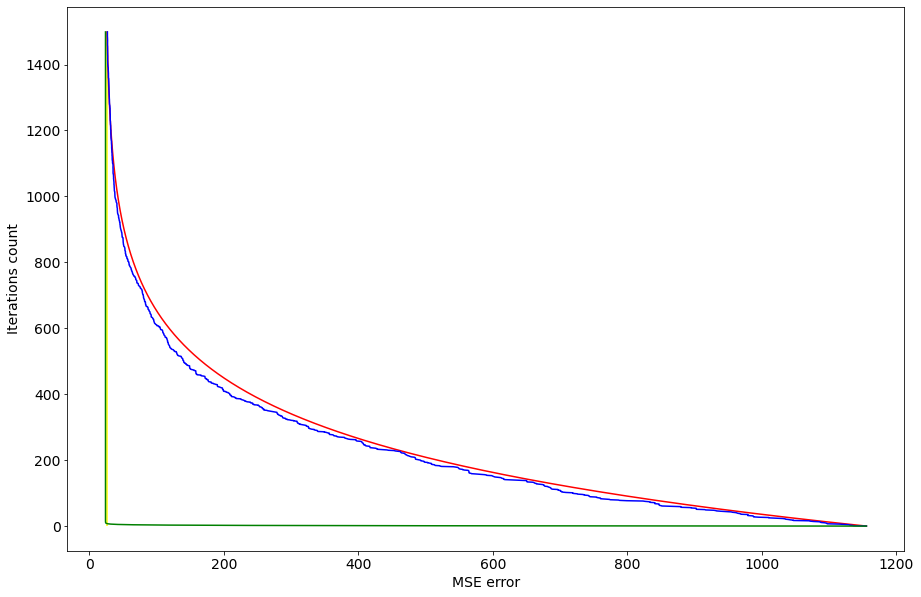

In [155]:
plt.figure(figsize=(15, 10))
plt.xlabel("MSE error")
plt.ylabel("Iterations count")
plt.plot(gd_err,iterations, color="red")
plt.plot(sgd_err,iterations, color="blue")
plt.plot(mb_err,iterations, color="green")
plt.vlines(26.995611345195748, iterations.min(), iterations.max(), color="yellow")
plt.show()

In [156]:
# Градиентный и стохастический спуск сходятся на 1000 итераций.
# При добавлении mini-batch пришлось увеличить до 1500 для получния схождения
# график mini-batch вышел какой-то странный, но не могу найти ошибку.
# Все изменения для подсчета ошибки вносила сразу в функцию.

In [157]:
# [*] Добавить в алгоритм градиентного спуска L1 регуляризацию.
# Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов (лучше графически).

In [158]:
# Метод градиентного спуска с L-1 регуляризацией
def eval_GD_1(X, y, iterations, alpha=1e-4,lambda_=1e-8, show=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    err_list = []
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        err_list.append(err)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * (w / abs(w)))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    if show == True:
        return err_list
    else:
        return w

In [159]:
# Метод градиентного спуска с L-2 регуляризацией
def eval_GD_2(X, y, iterations, alpha=1e-4,lambda_=1e-8, show=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    err_list = []
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        err_list.append(err)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + 2 * lambda_ * w)
        if i % (iterations / 10) == 0:
            print(i, w, err)
    if show == True:
        return err_list
    else:
        return w

In [160]:
l_1 = []
w_1 = []
for l in np.logspace(start=-4, stop=1, num=20):
    l_1.append(l)
    result_1 = eval_GD_1(X_, y_, iterations=1000, alpha=1e-4,lambda_=l, show=False)
    w_1.append(result_1)

100 [ 0.47472623  0.01984989  0.8525439   2.14644784 -0.24752113 -0.21513791
  1.53899995  0.73420163 -0.47345545  0.52853476] 1109.838957610534
200 [ 0.45344055  0.17458628  1.05302282  2.75717494 -0.26034806 -0.19671321
  1.49972056  0.70208036 -0.4771797   0.51494242] 1065.7382191916324
300 [ 0.43283759  0.32601827  1.24921847  3.3554705  -0.27264963 -0.17884799
  1.46135428  0.67103904 -0.48065544  0.50177103] 1023.4336144759936
400 [ 0.41289837  0.47421598  1.44122202  3.94158855 -0.28444094 -0.16152775
  1.42388119  0.64104666 -0.48389076  0.48900891] 982.8518157492402
500 [ 0.3936044   0.61924803  1.62912273  4.5157779  -0.2957367  -0.14473833
  1.38728176  0.61207301 -0.48689351  0.47664471] 943.9224954464296
600 [ 0.37493765  0.76118161  1.81300794  5.07828227 -0.30655123 -0.12846591
  1.35153688  0.5840887  -0.48967135  0.46466734] 906.578203156574
700 [ 0.35688057  0.90008247  1.99296316  5.62934037 -0.31689852 -0.11269701
  1.31662783  0.55706512 -0.49223172  0.45306602] 87

1000 [ 0.30557796  1.29870417  2.50945788  7.2155303  -0.34464979 -0.06766691
  1.21611426  0.48086087 -0.49806133  0.41979505] 771.8400789386842
100 [ 0.47460112  0.01994483  0.85241876  2.1463226  -0.24739599 -0.21501284
  1.53887478  0.73407638 -0.4733303   0.52840959] 1109.8462573971399
200 [ 0.45319285  0.17455425  1.05277511  2.75692689 -0.26010026 -0.1964658
  1.49947272  0.70183225 -0.47693199  0.51469459] 1065.755870371599
300 [ 0.43246973  0.32586177  1.2488507   3.3551021  -0.27228157 -0.17848094
  1.46098626  0.67067043 -0.48028774  0.50140304] 1023.4609951682838
400 [ 0.41241272  0.47393743  1.44073666  3.9411022  -0.28395495 -0.16104371
  1.42339541  0.64055986 -0.48340556  0.48852322] 982.8883329221646
500 [ 0.39300327  0.61884982  1.62852218  4.51517595 -0.29513507 -0.14413988
  1.38668059  0.61147029 -0.48629327  0.47604369] 943.9675836909969
600 [ 0.37422333  0.76066607  1.81229458  5.07756703 -0.30583622 -0.12775558
  1.35082265  0.58337229 -0.48895847  0.46395335] 9

800 [ 0.31994306  1.02042661  2.14964039  6.1496929  -0.30729548 -0.07809872
  1.26307456  0.51143468 -0.47516964  0.42237802] 837.8040177411502
900 [ 0.30083145  1.15115039  2.31977476  6.67633215 -0.31452021 -0.06111653
  1.22756533  0.48401358 -0.47511217  0.40928317] 804.9747733504023
1000 [ 0.28232339  1.27907555  2.48627022  7.19225671 -0.32136085 -0.04464753
  1.19288278  0.45751485 -0.47490433  0.3965787 ] 773.478060935454
100 [ 0.46994462  0.02318921  0.84776118  2.14166107 -0.24273838 -0.21035773
  1.53421594  0.72941483 -0.46867254  0.52375066] 1110.1226831158635
200 [ 0.44397382  0.17307871  1.04355551  2.74769489 -0.25087747 -0.18725745
  1.49024866  0.69259796 -0.46771288  0.50547077] 1066.4179594952611
300 [ 0.41877811  0.3197586   1.23516268  3.34139086 -0.25858241 -0.16481988
  1.44728908  0.65695118 -0.46660244  0.48770716] 1024.4860240809603
400 [ 0.39433669  0.46329713  1.4226719   3.92300113 -0.2658665  -0.14302828
  1.40531532  0.62244177 -0.46534725  0.47044622] 

In [161]:
l_2 = []
w_2 = []
for l in np.logspace(start=-4, stop=1, num=20):
    l_2.append(l)
    result_2 = eval_GD_2(X_, y_, iterations=1000, alpha=1e-4,lambda_=l, show=False)
    w_2.append(list(result_2))

100 [ 0.47472626  0.01984925  0.8525434   2.1464452  -0.24752165 -0.21513846
  1.53899785  0.73420113 -0.4734555   0.52853469] 1109.8391289353972
200 [ 0.45344064  0.17458646  1.05302144  2.75716849 -0.26034906 -0.19671433
  1.49971648  0.70207943 -0.4771798   0.5149423 ] 1065.7386131849685
300 [ 0.43283779  0.32601895  1.24921583  3.35545912 -0.27265108 -0.17884971
  1.46134835  0.67103775 -0.48065559  0.50177089] 1023.4343013515826
400 [ 0.41289871  0.47421686  1.44121777  3.94157116 -0.28444282 -0.16153008
  1.4238735   0.64104507 -0.48389094  0.48900879] 982.8528578152245
500 [ 0.3936049   0.61924881  1.62911652  4.51575347 -0.29573898 -0.1447413
  1.38727243  0.61207118 -0.48689373  0.47664461] 943.9239476714588
600 [ 0.37493835  0.76118201  1.81299945  5.07824982 -0.3065539  -0.12846954
  1.35152601  0.58408668 -0.4896716   0.46466729] 906.5801137020603
700 [ 0.3568815   0.90008224  1.99295207  5.62929896 -0.31690155 -0.1127013
  1.31661553  0.55706296 -0.49223199  0.45306604] 87

700 [ 0.3561747   0.89942279  1.99072819  5.6232415  -0.31645821 -0.11242477
  1.31423716  0.55596231 -0.49144343  0.4522441 ] 871.1218706392359
800 [ 0.33863392  1.03512897  2.16636108  6.16172333 -0.32628626 -0.09712683
  1.27986641  0.5297506  -0.49368849  0.44091105] 836.8314929184464
900 [ 0.32167425  1.16790112  2.33819584  6.68911474 -0.33567381 -0.08231047
  1.24630916  0.50445231 -0.49573239  0.4299377 ] 803.9433262967987
1000 [ 0.30527918  1.29780225  2.5063143   7.205645   -0.34463396 -0.06796291
  1.21354731  0.48004061 -0.49758202  0.41931387] 772.3996852368333
100 [ 0.47450234  0.01987691  0.85219831  2.14560071 -0.24741128 -0.21503526
  1.53828001  0.73385486 -0.47323861  0.52828797] 1109.892392758469
200 [ 0.45300671  0.17456981  1.05224535  2.75521235 -0.26012565 -0.19651907
  1.49831377  0.70140774 -0.47674909  0.51445993] 1065.8626712047671
300 [ 0.43220704  0.32588913  1.2479267   3.35213553 -0.27231239 -0.17857294
  1.45929257  0.6700604  -0.48001426  0.50106346] 1

1000 [ 0.27267515  1.24640286  2.37212679  6.83119901 -0.32175427 -0.05652177
  1.10110165  0.42903338 -0.45855004  0.38026679] 794.0994561767175
100 [ 0.46627089  0.02088952  0.83950635  2.11453887 -0.24335327 -0.21124187
  1.51189052  0.72112569 -0.46526474  0.51921796] 1111.854049254734
200 [ 0.43719714  0.17393198  1.02392179  2.68380255 -0.25198094 -0.18940673
  1.44720133  0.67693585 -0.46105146  0.4968833 ] 1070.4028601951004
300 [ 0.40943296  0.32109742  1.20122019  3.23165835 -0.26006555 -0.16858479
  1.38504324  0.63477101 -0.45684027  0.47551316] 1031.285928101202
400 [ 0.38292099  0.46261115  1.3716759   3.75891219 -0.26763492 -0.14873133
  1.32531815  0.59454104 -0.45263647  0.4550664 ] 994.357900955543
500 [ 0.35760635  0.59868992  1.53555271  4.26633961 -0.27471559 -0.12980353
  1.26793175  0.55615977 -0.44844498  0.43550366] 959.4831716989235
600 [ 0.33343647  0.72954211  1.69310425  4.75468691 -0.28133281 -0.11176039
  1.21279334  0.51954476 -0.44427035  0.41678721] 92

In [162]:
w_1 = np.array(w_1)
w_2 = np.array(w_2)

In [163]:
y_l = np.logspace(start=-4, stop=1, num=20)
y_l

array([1.00000000e-04, 1.83298071e-04, 3.35981829e-04, 6.15848211e-04,
       1.12883789e-03, 2.06913808e-03, 3.79269019e-03, 6.95192796e-03,
       1.27427499e-02, 2.33572147e-02, 4.28133240e-02, 7.84759970e-02,
       1.43844989e-01, 2.63665090e-01, 4.83293024e-01, 8.85866790e-01,
       1.62377674e+00, 2.97635144e+00, 5.45559478e+00, 1.00000000e+01])

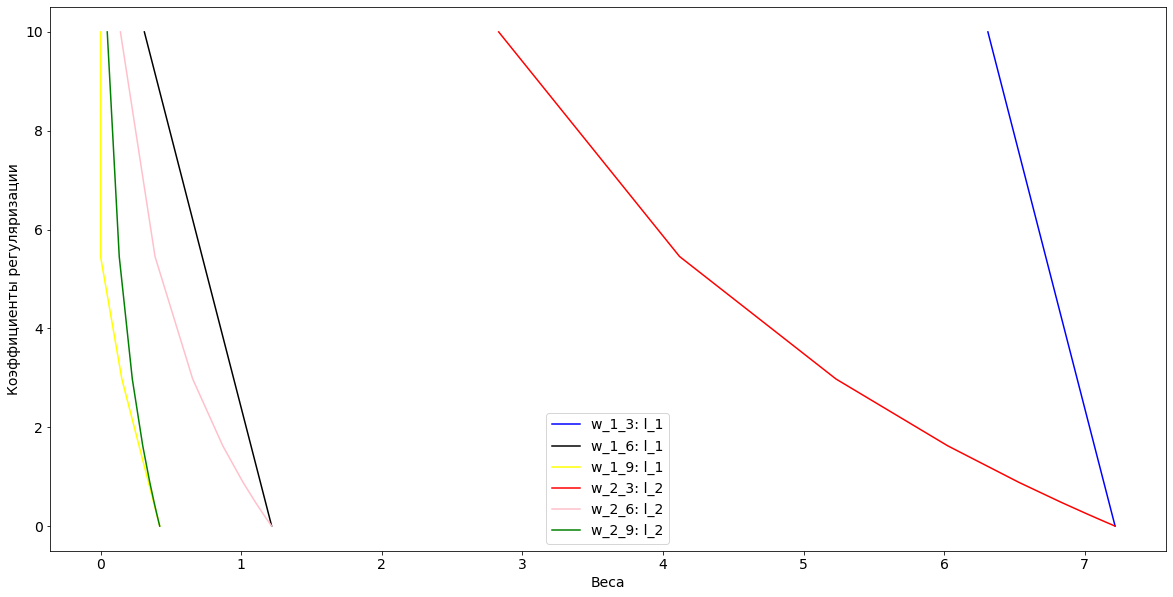

In [164]:
plt.figure(figsize=(20, 10))
plt.xlabel("Веса")
plt.ylabel("Коэффициенты регуляризации")
plt.plot(w_1[:,3], l_1, color="blue", label="w_1_3: l_1")
plt.plot(w_1[:,6], l_1, color="black", label="w_1_6: l_1")
plt.plot(w_1[:,9], l_1, color="yellow", label="w_1_9: l_1")

plt.plot(w_2[:,3], l_2,color="red", label="w_2_3: l_2")
plt.plot(w_2[:,6], l_2,color="pink", label="w_2_6: l_2")
plt.plot(w_2[:,9], l_2,color="green", label="w_2_9: l_2")

plt.legend(loc="lower center")
plt.show()

In [165]:
#  Увеличение коэффициентов регулярицации снижает веса (если вес большой, снижение сильнее, вес 3 на графике 
# изменяется очень сильно, вес 9 слабо отклонился от изначального)
# L-2 снижает сильнее за счет использования квадратичной функции
# Ошибка почему-то тоже снижается, хотя не должна